1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)

In [53]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
# Importing the dataset as 'vehicles'

vehicles = pd.read_csv('vehicle-1.csv')
vehicles.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
# Retriving the all the details of the dataset.

vehicles.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [4]:
# getting the details of all the columns.

vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
# Shape of the dataset.

vehicles.shape

(846, 19)

In [6]:
# Getting if there are any null values.

vehicles.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
# datsets mean, median, mode

vehicles.mean()

compactness                     93.678487
circularity                     44.828775
distance_circularity            82.110451
radius_ratio                   168.888095
pr.axis_aspect_ratio            61.678910
max.length_aspect_ratio          8.567376
scatter_ratio                  168.901775
elongatedness                   40.933728
pr.axis_rectangularity          20.582444
max.length_rectangularity      147.998818
scaled_variance                188.631079
scaled_variance.1              439.494076
scaled_radius_of_gyration      174.709716
scaled_radius_of_gyration.1     72.447743
skewness_about                   6.364286
skewness_about.1                12.602367
skewness_about.2               188.919527
hollows_ratio                  195.632388
dtype: float64

In [8]:
vehicles.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [9]:
vehicles['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [10]:
vehicles.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [11]:
# Replacing the null values with median.

columns = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']

for column in columns:
    vehicles[column].fillna(value =vehicles[column].mean(),inplace = True)

In [12]:
# Checking for all the null values 

vehicles.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [13]:
# Importing the necessary Libraries for the K-mean clustering

from scipy.stats import zscore

from kmodes.kprototypes import KPrototypes

from scipy.spatial.distance import cdist

In [14]:
# normalizing the dataframe except last column

vehicles_zscore = vehicles[['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']].apply(zscore)

vehicles_zscore.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.272965   
1    -0.325470    -0.624564              0.120112     -0.835442   
2     1.254193     0.843549              1.518571      1.201630   
3    -0.082445    -0.624564             -0.007021     -0.296217   
4    -1.054545    -0.135193             -0.769817      1.081803   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310206                 0.311542      -0.208038   
1             -0.593962                 0.094079      -0.599893   
2              0.548539                 0.311542       1.148382   
3              0.167705                 0.094079      -0.750606   
4              5.245485                 9.444962      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.403077          -0.343028                   0.285618   
1        -0.594546          -0.620879                  -0.513719   
2         1.096764           1.108603                   1.392391   
3        -0.913661          -0.739958                  -1.466773   
4         1.671171          -0.649231                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327938       -0.074340          0.380665   
1                    -0.059987        0.537873          0.156589   
2                     0.073989        1.558230         -0.403603   
3                    -1.265769       -0.074340         -0.291565   
4                     7.308682        0.537873         -0.179527   

   skewness_about.2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

In [15]:
# adding the class column to zscored dataset.

vehicles_zscore['class'] = vehicles['class']

In [16]:
# Replace the values of the class columns

replac = {'car' :1, 'van': 2, 'bus':3}

vehicles_zscore['class'].replace(replac,inplace = True)

In [17]:
vehicles_zscore.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.272965   
1    -0.325470    -0.624564              0.120112     -0.835442   
2     1.254193     0.843549              1.518571      1.201630   
3    -0.082445    -0.624564             -0.007021     -0.296217   
4    -1.054545    -0.135193             -0.769817      1.081803   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310206                 0.311542      -0.208038   
1             -0.593962                 0.094079      -0.599893   
2              0.548539                 0.311542       1.148382   
3              0.167705                 0.094079      -0.750606   
4              5.245485                 9.444962      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.403077          -0.343028                   0.285618   
1        -0.594546          -0.620879                  -0.513719   
2         1.096764           1.108603                   1.392391   
3        -0.913661          -0.739958                  -1.466773   
4         1.671171          -0.649231                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327938       -0.074340          0.380665   
1                    -0.059987        0.537873          0.156589   
2                     0.073989        1.558230         -0.403603   
3                    -1.265769       -0.074340         -0.291565   
4                     7.308682        0.537873         -0.179527   

   skewness_about.2  hollows_ratio  class  
0         -0.312193       0.183957      2  
1          0.013088       0.452977      2  
2         -0.149552       0.049447      1  
3          1.639494       1.529056      2  
4         -1.450677      -1.699181      3

As the there is sudden decrease in cost at 4. so, the we can choose number of clusters as 4 


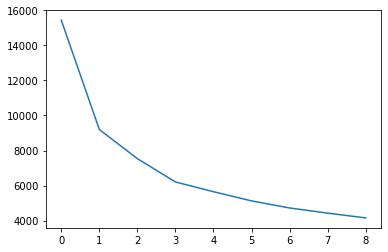

In [18]:
# Getting the optimal value of 'K'

cost = []

for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(vehicles_zscore, categorical=[18])
    cost.append(kproto.cost_)

plt.plot(cost);

print('As the there is sudden decrease in cost at 4. so, the we can choose number of clusters as 4 ')

In [19]:
# Choosing the clusters as 4

final_model = KPrototypes(n_clusters = 4, init = 'Cao')

prediction = final_model.fit_predict(vehicles_zscore,categorical = [18])

In [20]:
# Assigning the class values to the dataset.

vehicles['target'] = prediction

vehicles.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  target  
0             187.0            197   van       0  
1             189.0            199   van       0  
2             188.0            196   car       3  
3             199.0            207   van       0  
4             180.0            183   bus       1

In [21]:
vehicles['target'].value_counts()

0    289
2    282
3    267
1      8
Name: target, dtype: int64

In [22]:
print(' By using the unsupervised learning algorithm we got the target value')

 By using the unsupervised learning algorithm we got the target value


2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)

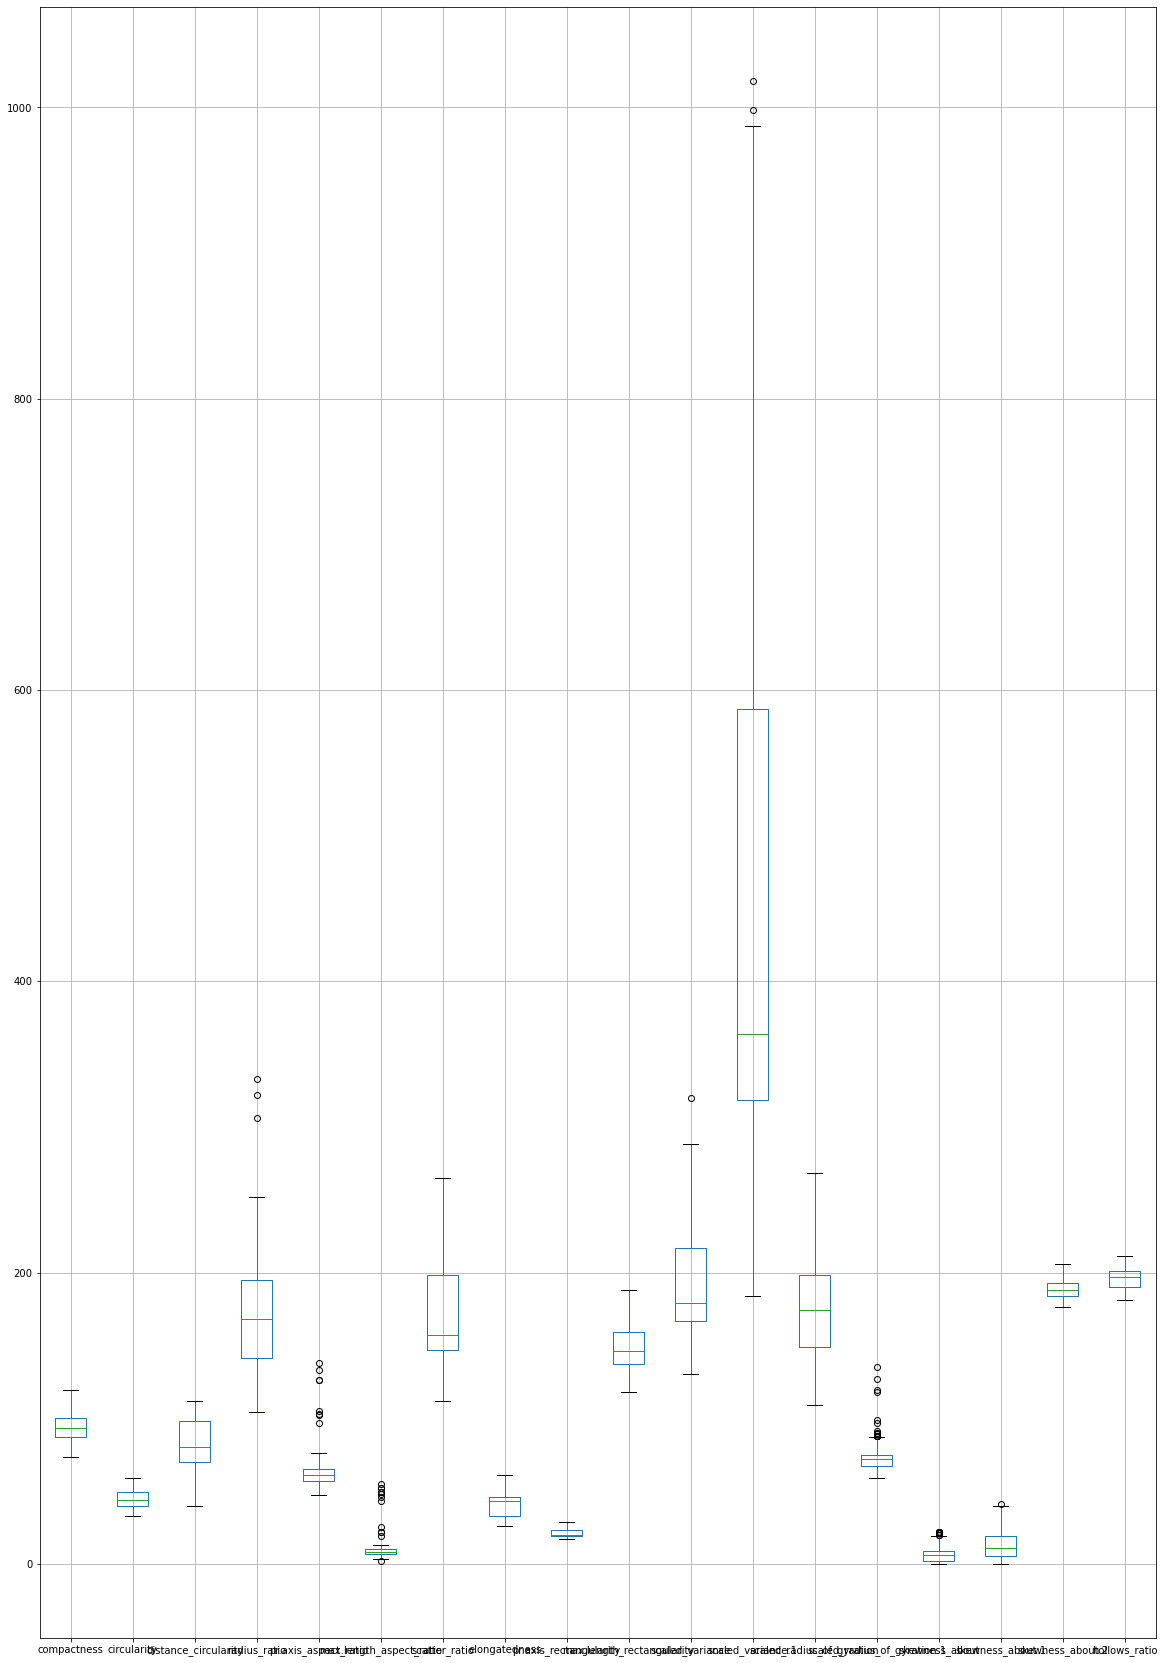

In [23]:
# Finding the outliers using boxplot

plt.figure(figsize = (20,30))

vehicles.boxplot(column =  ['compactness', 'circularity', 'distance_circularity', 'radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1','skewness_about.2', 'hollows_ratio'],);

In [24]:
# We have some outliers in the dataframe. 

In [25]:
# Treating the outliers 

# Finding the Q1, Q3, median, mean

Q1 = vehicles.quantile(0.25)
Median = vehicles.quantile(0.50)
Q3 = vehicles.quantile(0.75)

print('First Quartile : ')
print(Q1)
print(' ')
print('Median : ')
print(Median)
print(' ')
print('Third Quartile : ')
print(Q3)

First Quartile : 
compactness                     87.00
circularity                     40.00
distance_circularity            70.00
radius_ratio                   141.00
pr.axis_aspect_ratio            57.00
max.length_aspect_ratio          7.00
scatter_ratio                  147.00
elongatedness                   33.00
pr.axis_rectangularity          19.00
max.length_rectangularity      137.00
scaled_variance                167.00
scaled_variance.1              318.25
scaled_radius_of_gyration      149.00
scaled_radius_of_gyration.1     67.00
skewness_about                   2.00
skewness_about.1                 5.00
skewness_about.2               184.00
hollows_ratio                  190.25
target                           0.00
Name: 0.25, dtype: float64
 
Median : 
compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   168.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0

In [26]:
# IQR Value

IQR = Q3 - Q1
print('Interquartile range : ')
print(IQR)

Interquartile range : 
compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
target                           3.00
dtype: float64


In [27]:
# Upper boundary values for all the columns

max_value = Q3 + 1.5*IQR
max_value

compactness                    119.500
circularity                     62.500
distance_circularity           140.000
radius_ratio                   276.000
pr.axis_aspect_ratio            77.000
max.length_aspect_ratio         14.500
scatter_ratio                  274.500
elongatedness                   65.500
pr.axis_rectangularity          29.000
max.length_rectangularity      192.000
scaled_variance                292.000
scaled_variance.1              989.500
scaled_radius_of_gyration      271.500
scaled_radius_of_gyration.1     87.000
skewness_about                  19.500
skewness_about.1                40.000
skewness_about.2               206.500
hollows_ratio                  217.125
target                           7.500
dtype: float64

In [28]:
# Lower boundary values for all the columns

min_value = Q1 - 1.5*IQR
min_value

compactness                     67.500
circularity                     26.500
distance_circularity            28.000
radius_ratio                    60.000
pr.axis_aspect_ratio            45.000
max.length_aspect_ratio          2.500
scatter_ratio                   70.500
elongatedness                   13.500
pr.axis_rectangularity          13.000
max.length_rectangularity      104.000
scaled_variance                 92.000
scaled_variance.1              -84.500
scaled_radius_of_gyration       75.500
scaled_radius_of_gyration.1     55.000
skewness_about                  -8.500
skewness_about.1               -16.000
skewness_about.2               170.500
hollows_ratio                  174.125
target                          -4.500
dtype: float64

In [29]:
# Target variable 'target'

vehicles['target'].value_counts()


0    289
2    282
3    267
1      8
Name: target, dtype: int64

In [30]:
# Making an columns list which contains outliers.

columns = [['max.length_rectangularity','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance', 'scaled_variance.1','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']]

In [31]:
vehicles.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class', 'target'],
      dtype='object')

In [32]:
max_value['skewness_about.1']

40.0

In [33]:
# Making upper Boundary outliers to '0' and replacing that with 'median' for all columns.

# For the column 'radius_ratio'

outlier1 = vehicles[vehicles['radius_ratio'] > 276.0]['radius_ratio'].index
vehicles.loc[outlier1,'radius_ratio'] = 0
vehicles.loc[outlier1,'radius_ratio'] = vehicles['radius_ratio'].median()

# For the column 'pr.axis_aspect_ratio'

outlier3 = vehicles[vehicles['pr.axis_aspect_ratio'] > 77]['pr.axis_aspect_ratio'].index
vehicles.loc[outlier3,'pr.axis_aspect_ratio'] = 0
vehicles.loc[outlier3,'pr.axis_aspect_ratio'] = vehicles['pr.axis_aspect_ratio'].median()

# For the column 'max.length_aspect_ratio'

outlier3 = vehicles[vehicles['max.length_aspect_ratio'] > 14.5]['max.length_aspect_ratio'].index
vehicles.loc[outlier3,'max.length_aspect_ratio'] = 0
vehicles.loc[outlier3,'max.length_aspect_ratio'] = vehicles['max.length_aspect_ratio'].median()

# For the column 'scaled_variance'

outlier4 = vehicles[vehicles['scaled_variance'] > 292]['scaled_variance'].index
vehicles.loc[outlier4,'scaled_variance'] = 0
vehicles.loc[outlier4,'scaled_variance'] = vehicles['scaled_variance'].median()

# For the column 'scaled_variance.1'

outlier5 = vehicles[vehicles['scaled_variance.1'] > 989.5]['scaled_variance.1'].index
vehicles.loc[outlier5,'scaled_variance.1'] = 0
vehicles.loc[outlier5,'scaled_variance.1'] = vehicles['scaled_variance.1'].median()

# For the column 'scaled_radius_of_gyration.1'

outlier6 = vehicles[vehicles['scaled_radius_of_gyration.1'] > 87]['scaled_radius_of_gyration.1'].index
vehicles.loc[outlier6,'scaled_radius_of_gyration.1'] = 0
vehicles.loc[outlier6,'scaled_radius_of_gyration.1'] = vehicles['scaled_radius_of_gyration.1'].median()

# For the column 'skewness_about'

outlier7 = vehicles[vehicles['skewness_about'] > 19.5]['skewness_about'].index
vehicles.loc[outlier7,'skewness_about'] = 0
vehicles.loc[outlier7,'skewness_about'] = vehicles['skewness_about'].median()


# For the column 'skewness_about.1'

outlier8 = vehicles[vehicles['skewness_about.1'] > 40]['skewness_about.1'].index
vehicles.loc[outlier8,'skewness_about.1'] = 0
vehicles.loc[outlier8,'skewness_about.1'] = vehicles['skewness_about.1'].median()



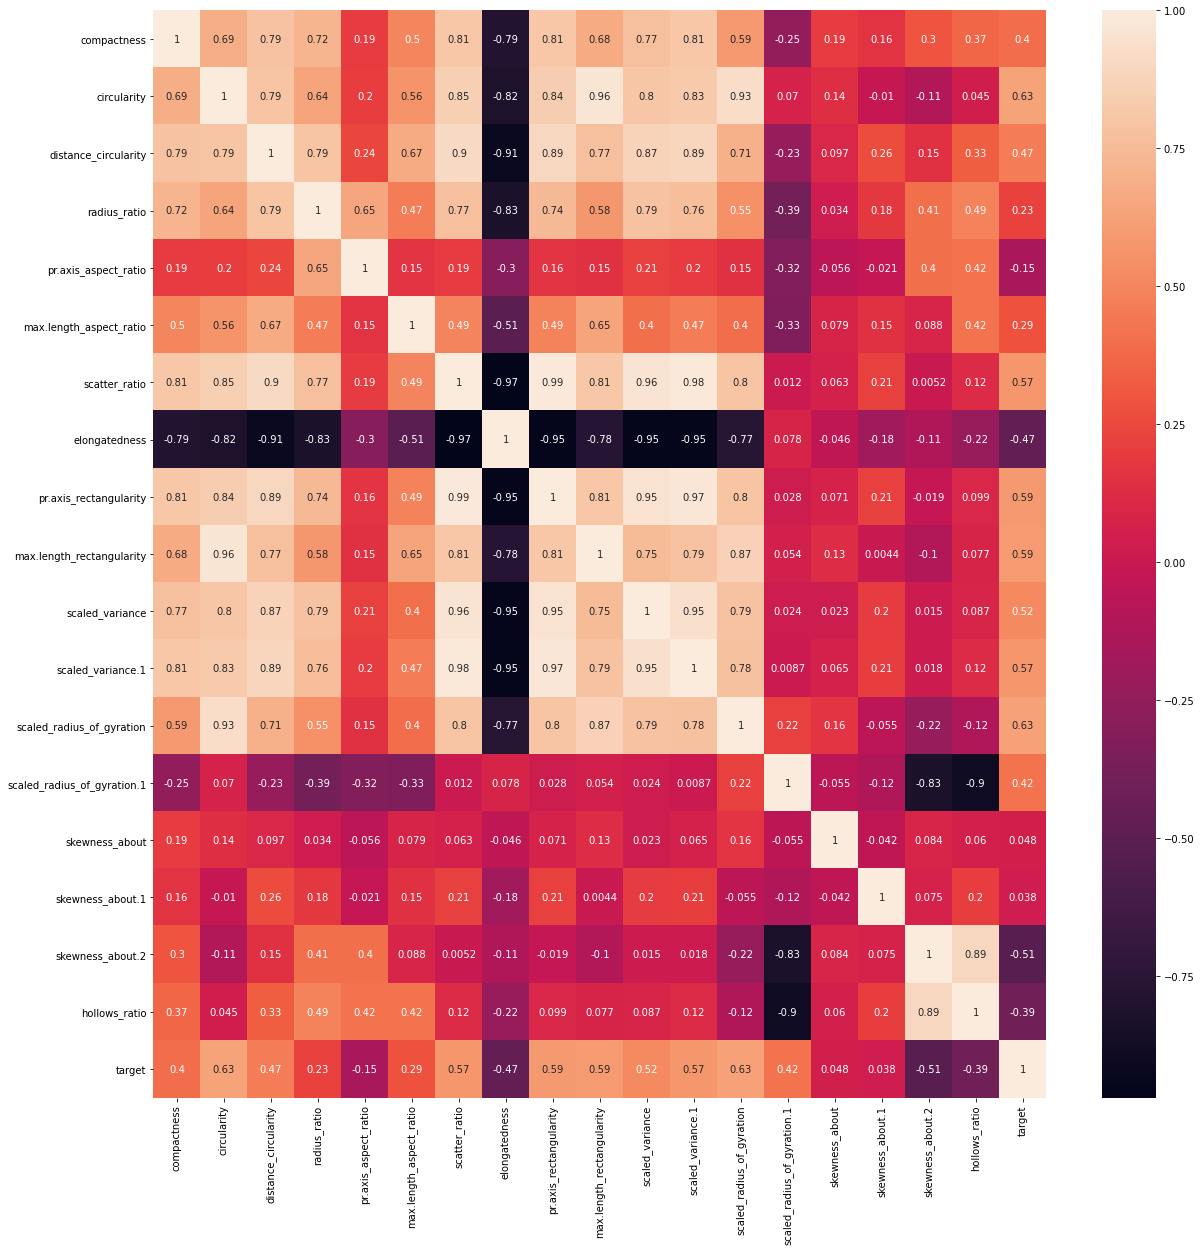

In [34]:
# heatmap of correlated data.

plt.figure(figsize = (20,20))

corr_matrix = sns.heatmap(vehicles.corr(), annot = True);
corr_matrix;

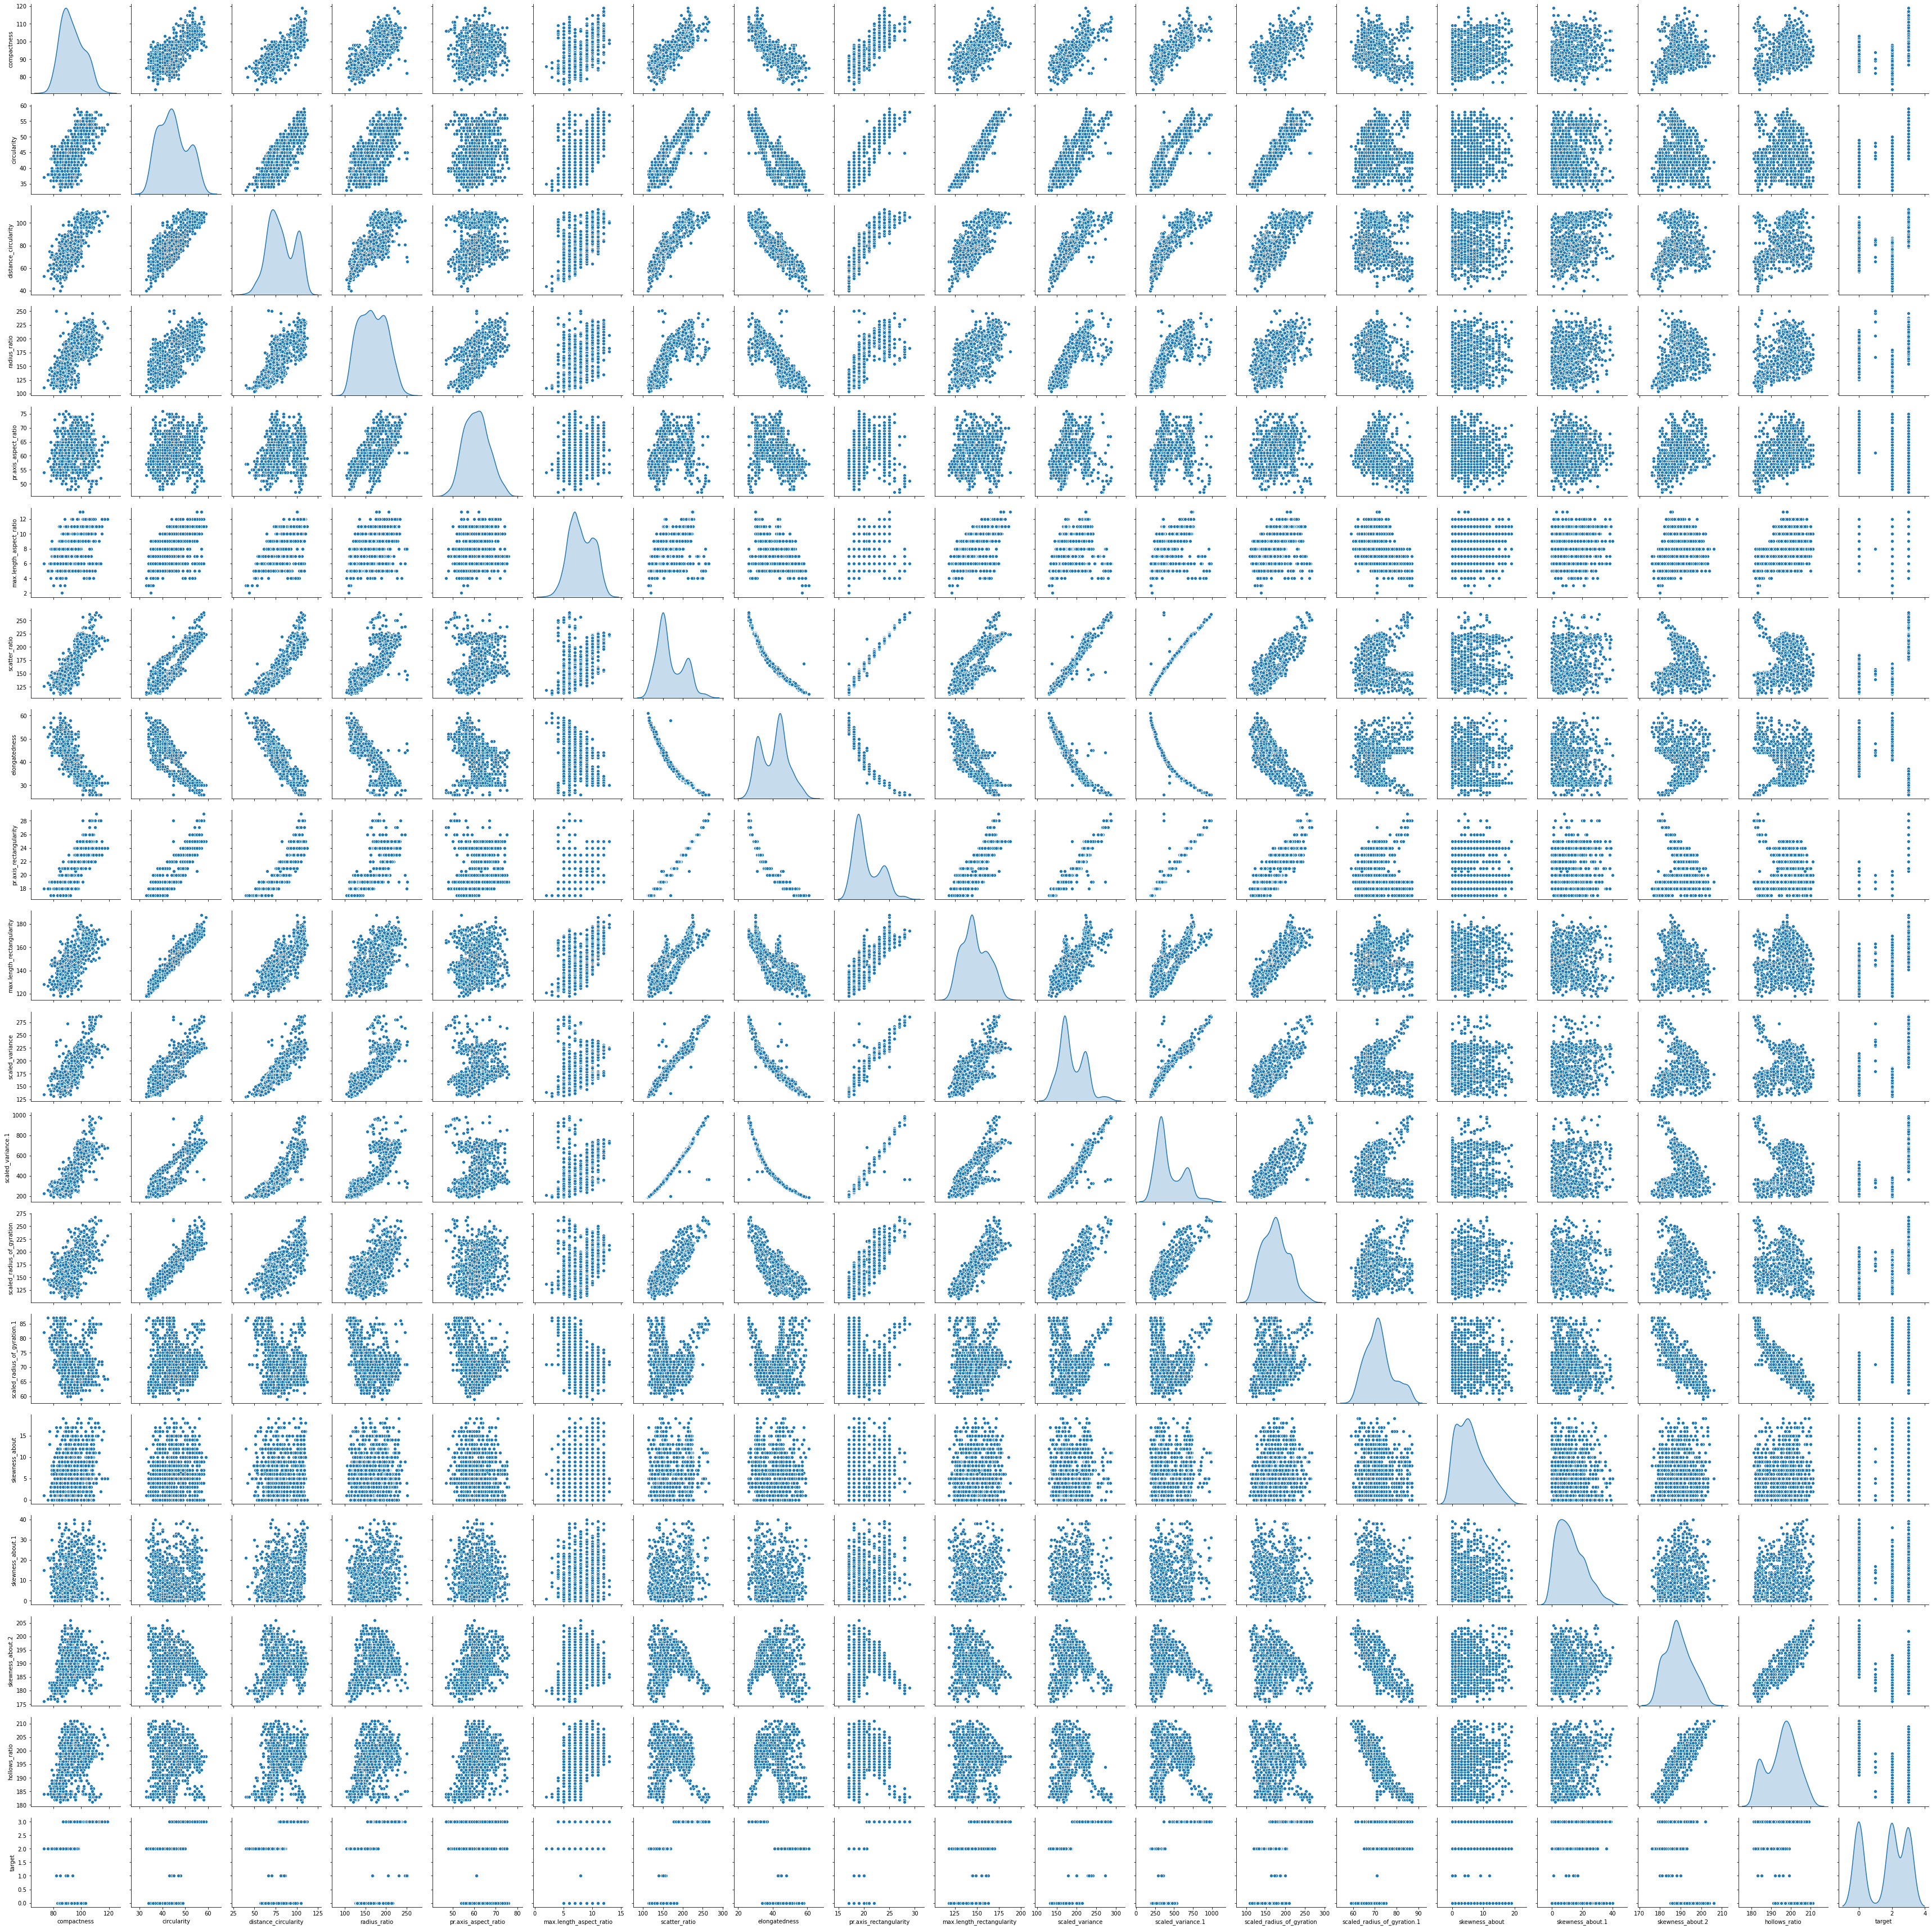

In [35]:
# Pairplot of the data 

sns.pairplot(vehicles, diag_kind='kde');

# Many of the columns are correlated.

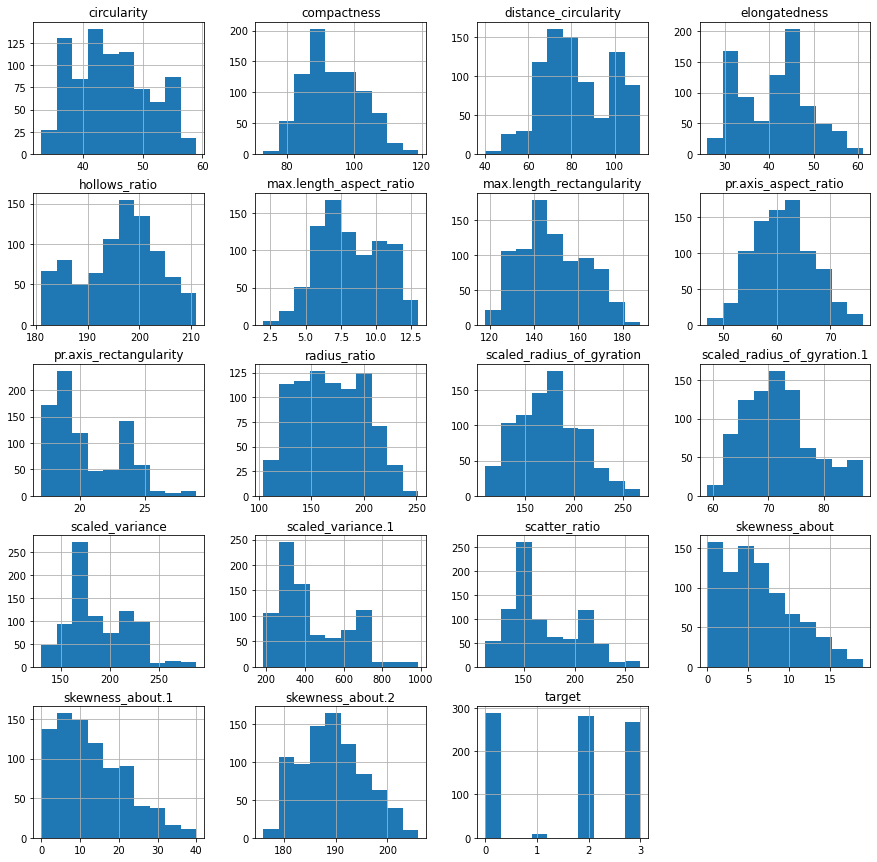

In [39]:
# Histogram of all the columns

vehicles.hist(figsize = (15,15));

In [44]:
# skewness of the data.

vehicles.skew()

# The columns are moderately skewed.

compactness                    0.381271
circularity                    0.262584
distance_circularity           0.106837
radius_ratio                   0.117430
pr.axis_aspect_ratio           0.160361
max.length_aspect_ratio        0.068840
scatter_ratio                  0.607629
elongatedness                  0.047875
pr.axis_rectangularity         0.772254
max.length_rectangularity      0.256359
scaled_variance                0.599644
scaled_variance.1              0.818309
scaled_radius_of_gyration      0.279647
scaled_radius_of_gyration.1    0.536878
skewness_about                 0.631167
skewness_about.1               0.674117
skewness_about.2               0.249468
hollows_ratio                 -0.226341
target                        -0.322342
dtype: float64

In [40]:
vehicles.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class', 'target'],
      dtype='object')

In [41]:
# copying the dataset to vehicles1

vehicles1 = vehicles.copy()


In [42]:
#with dropping the above mentioned columns manually by using the heatmap
#drop the columns

vehicles1.drop(['scaled_radius_of_gyration','skewness_about.2','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1'],axis = 1,inplace = True)

# The columns are removed because it effects the columns.

In [43]:
# After removing the highly correlated columns

vehicles1.shape

(846, 13)

3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)

In [45]:
# Replace the values of the class columns

replac = {'car' :1, 'van': 2, 'bus':3}

vehicles1['class'].replace(replac,inplace = True)

In [46]:
vehicles1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  max.length_rectangularity  \
0                  72.0                     10.0                        159   
1                  57.0                      9.0                        143   
2                  66.0                     10.0                        158   
3                  63.0                      9.0                        143   
4                  61.0                      8.0                        144   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         71.0             9.0              11.0   

   hollows_ratio  class  target  
0            197      2       0  
1            199      2       0  
2            196      1       3  
3            207      2       0  
4            183      3       1

In [47]:
vehicles1.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio',
       'max.length_rectangularity', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'hollows_ratio', 'class',
       'target'],
      dtype='object')

In [48]:
# Splitting the data into X and y

X_vehicles1 = vehicles1[['compactness', 'circularity', 'distance_circularity',
                         'radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio',
                         'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1','hollows_ratio', 'class']]

y_vehicles1 = vehicles1['target']

In [49]:
# Splitting the data into train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vehicles1, y_vehicles1, test_size=0.30, random_state=42)

4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks)

In [50]:
# Training the support vector machines and getting the accuracy

clf = svm.SVC(gamma = 0.025, C = 3)
clf.fit(X_train,y_train)


SVC(C=3, gamma=0.025)

In [51]:
# Getting the score of test set. 

clf.score(X_test,y_test)

# It all over accuracy is 81%

0.8110236220472441

In [55]:
# 5. Perform K-fold cross validation and get the cross validation score of the model

In [54]:
# K fold cross validation 

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = svm.SVC(gamma = 0.025, C = 3)
results = cross_val_score(model, X_vehicles1, y_vehicles1, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


c:\users\dgandra\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[0.94117647 0.88235294 0.94117647 1.         0.82352941 0.94117647
 0.76470588 0.94117647 1.         0.82352941 1.         0.82352941
 0.82352941 0.94117647 1.         0.94117647 0.94117647 0.82352941
 0.76470588 1.         0.88235294 1.         0.82352941 0.94117647
 0.94117647 0.94117647 0.88235294 0.94117647 1.         0.88235294
 0.88235294 1.         0.88235294 0.94117647 1.         0.88235294
 0.82352941 0.94117647 1.         0.94117647 0.76470588 0.88235294
 1.         0.94117647 0.82352941 0.94117647 0.875      0.9375
 0.875      0.9375    ]
Accuracy: 91.250% (6.893%)


6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)

In [56]:
# Replace the values of the class columns

replac = {'car' :1, 'van': 2, 'bus':3}

vehicles['class'].replace(replac,inplace = True)

In [57]:
# Dataframe vehicles

vehicles.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                  61.0                      8.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         71.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  target  
0             187.0            197      2       0  
1             189.0            199      2       0  
2             188.0            196      1       3  
3             199.0            207      2       0  
4             180.0            183      3       1

In [58]:
#independent variables

X = vehicles.drop(['target','class'], axis = 1)

#dependednt variables

y = vehicles['target']

In [59]:
# Scaling the data

X_scaled = X.apply(zscore)
X_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.300530   
1    -0.325470    -0.624564              0.120112     -0.851087   
2     1.254193     0.843549              1.518571      1.265398   
3    -0.082445    -0.624564             -0.007021     -0.290841   
4    -1.054545    -0.135193             -0.769817      1.140899   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.932830                 0.910934      -0.208038   
1             -0.740875                 0.428675      -0.599893   
2              0.863348                 0.910934       1.148382   
3              0.328607                 0.428675      -0.750606   
4             -0.027887                -0.053584      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401938          -0.338503                   0.285618   
1        -0.595419          -0.619779                  -0.513719   
2         1.113664           1.131022                   1.392391   
3        -0.917888          -0.740326                  -1.466773   
4         1.694107          -0.648481                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.315042       -0.029778          0.386956   
1                     0.009832        0.626352          0.161529   
2                     0.172269        1.719903         -0.402038   
3                    -1.452101       -0.029778         -0.289325   
4                    -0.152605        0.626352         -0.176611   

   skewness_about.2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

In [60]:
# Attaching the categorical data

X_scaled['class'] = vehicles['class']

In [61]:
X_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.300530   
1    -0.325470    -0.624564              0.120112     -0.851087   
2     1.254193     0.843549              1.518571      1.265398   
3    -0.082445    -0.624564             -0.007021     -0.290841   
4    -1.054545    -0.135193             -0.769817      1.140899   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.932830                 0.910934      -0.208038   
1             -0.740875                 0.428675      -0.599893   
2              0.863348                 0.910934       1.148382   
3              0.328607                 0.428675      -0.750606   
4             -0.027887                -0.053584      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401938          -0.338503                   0.285618   
1        -0.595419          -0.619779                  -0.513719   
2         1.113664           1.131022                   1.392391   
3        -0.917888          -0.740326                  -1.466773   
4         1.694107          -0.648481                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.315042       -0.029778          0.386956   
1                     0.009832        0.626352          0.161529   
2                     0.172269        1.719903         -0.402038   
3                    -1.452101       -0.029778         -0.289325   
4                    -0.152605        0.626352         -0.176611   

   skewness_about.2  hollows_ratio  class  
0         -0.312193       0.183957      2  
1          0.013088       0.452977      2  
2         -0.149552       0.049447      1  
3          1.639494       1.529056      2  
4         -1.450677      -1.699181      3

In [62]:
# covariance matrix

covMatrix = np.cov(X_scaled, rowvar = False)

In [63]:
print(covMatrix)

[[ 1.00118343  0.68623251  0.79084412  0.72287582  0.19332811  0.50113637
   0.81319623 -0.78957587  0.81459888  0.67694334  0.77148742  0.80901567
   0.58584865 -0.24651768  0.19332329  0.15690754  0.2988797   0.36598446
  -0.2199936 ]
 [ 0.68623251  1.00118343  0.79395399  0.63910181  0.20297793  0.56333196
   0.84921058 -0.82287347  0.84597164  0.96308094  0.80424197  0.83103764
   0.92798524  0.0700271   0.1354689  -0.01009024 -0.1057698   0.04537164
  -0.09336508]
 [ 0.79084412  0.79395399  1.00118343  0.79521378  0.24459503  0.67229365
   0.90547061 -0.91251368  0.89418513  0.77558624  0.87108073  0.88630388
   0.70678835 -0.22841143  0.09754663  0.26266461  0.14573497  0.3324884
  -0.30484486]
 [ 0.72287582  0.63910181  0.79521378  1.00118343  0.65150897  0.46837898
   0.7706464  -0.82669516  0.74492526  0.58041565  0.7877779   0.76297171
   0.5515937  -0.39165869  0.03407788  0.17991281  0.40624237  0.49228844
  -0.21316712]
 [ 0.19332811  0.20297793  0.24459503  0.65150897  1.

In [64]:
pca = PCA(n_components = 19)
pca.fit(X_scaled)

PCA(n_components=19)

In [65]:
# Eigon values

print(pca.explained_variance_)

[9.80216968e+00 3.40911725e+00 1.34310822e+00 1.18927437e+00
 9.03380068e-01 6.68686253e-01 4.76144454e-01 2.78238065e-01
 1.98105934e-01 1.06321235e-01 7.92358979e-02 7.23639043e-02
 6.07429648e-02 3.58286702e-02 3.00189101e-02 2.50247491e-02
 2.21274313e-02 1.88668241e-02 5.94890752e-03]


In [66]:
#eigon vectors

print(pca.components_)

[[ 2.72160552e-01  2.85712019e-01  3.02516330e-01  2.69495025e-01
   9.66857449e-02  1.97871762e-01  3.09178074e-01 -3.07766998e-01
   3.06199296e-01  2.76591527e-01  2.98315358e-01  3.04780199e-01
   2.61070831e-01 -4.47943303e-02  3.61658896e-02  6.03118465e-02
   3.90428087e-02  8.69492687e-02 -7.07261025e-02]
 [-8.30122260e-02  1.37208794e-01 -4.61204417e-02 -1.88199254e-01
  -2.37319473e-01 -1.17643738e-01  7.87355431e-02 -1.97133853e-02
   9.02902841e-02  1.26104365e-01  8.27697717e-02  7.47204928e-02
   2.15778674e-01  5.03334915e-01 -1.98530903e-02 -1.00735655e-01
  -4.88988410e-01 -5.02683330e-01  1.45777430e-01]
 [-6.42211524e-02  5.63743135e-02 -1.15023767e-01  2.24104818e-01
   5.73582074e-01 -3.00637510e-01 -9.25839632e-03 -6.34799460e-02
  -3.26566140e-02 -7.71084636e-03  5.90578805e-02 -6.82831343e-04
   1.00758005e-01  8.07307890e-02 -2.55445900e-01 -4.18360941e-01
   1.43990677e-01 -3.01767304e-02  4.71744775e-01]
 [ 5.44213690e-02  1.93430462e-01 -4.45438848e-02 -9.31

In [67]:
# Explained variance ratio

print(pca.explained_variance_ratio_)


[5.23488638e-01 1.82065217e-01 7.17292103e-02 6.35136548e-02
 4.82453596e-02 3.57114463e-02 2.54286775e-02 1.48594107e-02
 1.05799235e-02 5.67812640e-03 4.23162357e-03 3.86462211e-03
 3.24400137e-03 1.91344390e-03 1.60317142e-03 1.33645634e-03
 1.18172397e-03 1.00758999e-03 3.17703692e-04]


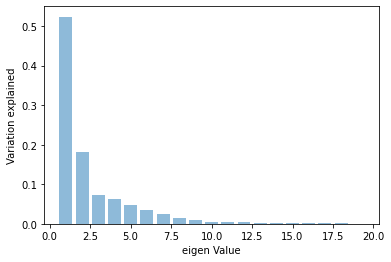

In [68]:
plt.bar(list(range(1,20)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

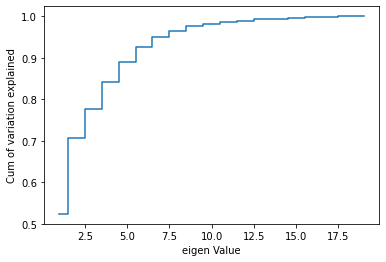

In [69]:
#plotting the graph between range(1,20) and explained variance

plt.step(list(range(1,20)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [70]:
# extracting Principal Components that capture about 95% of the variance in the data

# now 8 dimesions seems to be reasonable it captures 95%

pca3 = PCA(n_components=8)
pca3.fit(X_scaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X_scaled)

[[ 0.27216055  0.28571202  0.30251633  0.26949503  0.09668574  0.19787176
   0.30917807 -0.307767    0.3061993   0.27659153  0.29831536  0.3047802
   0.26107083 -0.04479433  0.03616589  0.06031185  0.03904281  0.08694927
  -0.0707261 ]
 [-0.08301223  0.13720879 -0.04612044 -0.18819925 -0.23731947 -0.11764374
   0.07873554 -0.01971339  0.09029028  0.12610437  0.08276977  0.07472049
   0.21577867  0.50333491 -0.01985309 -0.10073566 -0.48898841 -0.50268333
   0.14577743]
 [-0.06422115  0.05637431 -0.11502377  0.22410482  0.57358207 -0.30063751
  -0.0092584  -0.06347995 -0.03265661 -0.00771085  0.05905788 -0.00068283
   0.100758    0.08073079 -0.2554459  -0.41836094  0.14399068 -0.03017673
   0.47174478]
 [ 0.05442137  0.19343046 -0.04454388 -0.09314813 -0.03137576  0.1905389
  -0.10774052  0.10053561 -0.10051872  0.21745838 -0.15405586 -0.10948323
   0.18762211 -0.09029418  0.62150527 -0.60063976  0.05203317  0.05401482
  -0.02877993]
 [ 0.17469569 -0.13887339 -0.0544106   0.06256306 -0.0

In [71]:
Xpca3

array([[ 0.56520688, -0.60850341,  0.80194457, ..., -1.82686268,
        -0.45318064, -0.20376013],
       [-1.52168393, -0.36278364, -0.98497202, ..., -0.0576226 ,
        -0.63575953, -0.4051705 ],
       [ 3.95281038,  0.18474026, -0.10562543, ..., -0.74519691,
         0.95295563, -0.37431774],
       ...,
       [ 5.15871489, -0.20406112,  0.54841682, ...,  0.13992219,
         0.74443409, -0.72181531],
       [-3.22732466, -1.27403692, -1.12097025, ...,  0.01064839,
         0.30935703,  0.66867552],
       [-4.97249057,  0.36719182, -0.55333022, ...,  0.39740761,
        -0.20750397,  0.29955079]])

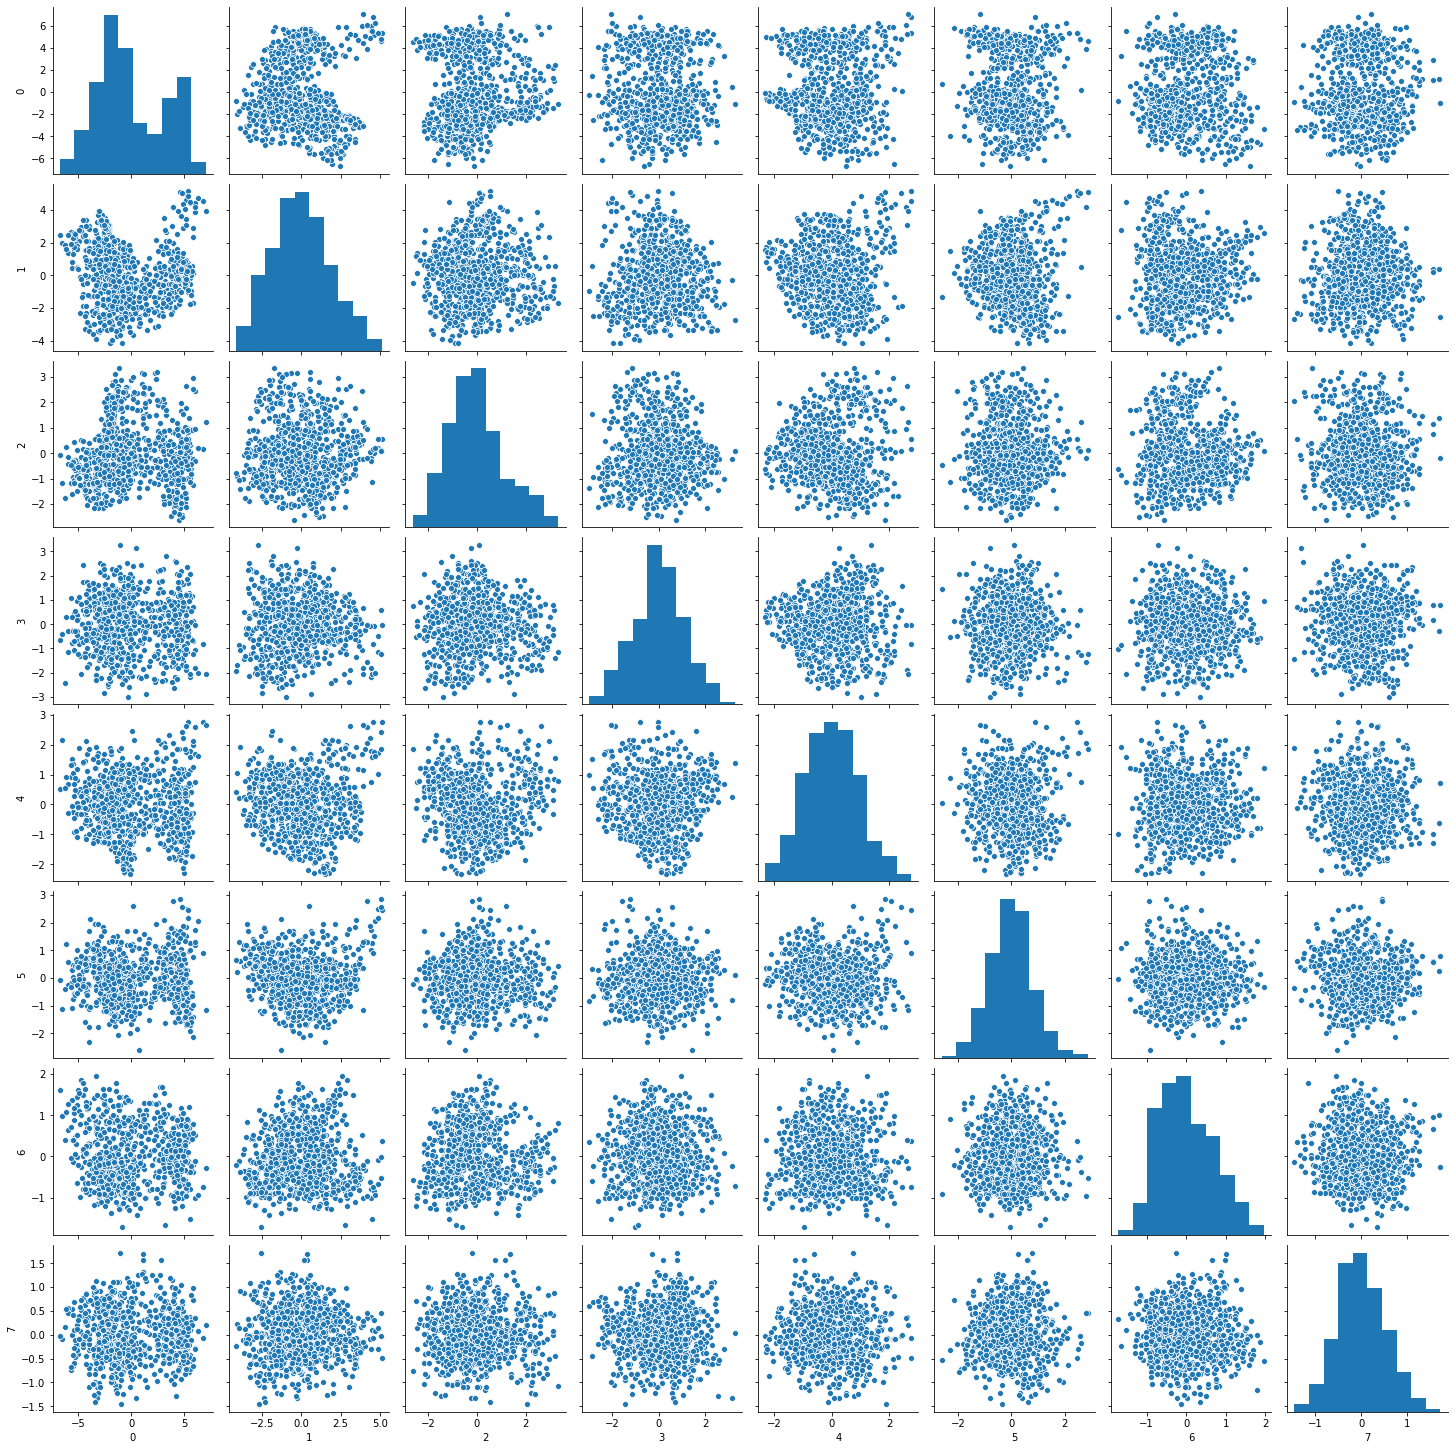

In [72]:
# Pairplot for Xpca3

sns.pairplot(pd.DataFrame(Xpca3));

In [78]:
# Training the support vector machines and getting the accuracy

clf1 = svm.SVC(gamma = 0.025, C = 3)

clf1.fit(Xpca3,y)

SVC(C=3, gamma=0.025)

In [79]:
# Score of pca data

clf1.score(Xpca3,y)

# The score is 98%

0.9810874704491725

In [80]:
# K fold cross validation for pca data

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = svm.SVC(gamma = 0.025, C = 3)
results = cross_val_score(model, Xpca3, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


c:\users\dgandra\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[0.88235294 0.94117647 0.94117647 1.         0.94117647 0.94117647
 0.94117647 0.94117647 1.         1.         1.         1.
 0.88235294 1.         1.         0.94117647 1.         0.94117647
 0.94117647 0.94117647 0.94117647 0.94117647 0.88235294 0.88235294
 1.         1.         1.         0.94117647 1.         1.
 0.94117647 1.         1.         1.         1.         0.88235294
 0.94117647 1.         1.         1.         0.94117647 0.88235294
 1.         1.         1.         1.         0.9375     1.
 1.         0.9375    ]
Accuracy: 96.456% (4.085%)


In [ ]:
# score svm classifier without pca and without kfold is 81%

# score svm classifier without pca and with kfold is 91.250%

# score svm classifier with pca and without kfold is 98%

# score svm classifier with pca and with kfold is 96.456%


In [ ]:
# Overall conculsion is that while using kflod score gets increased and with using pca data gets standardize.